epoch: 1/10 loss: 0.025
epoch: 2/10 loss: 0.016
epoch: 3/10 loss: 0.004
epoch: 4/10 loss: 0.014
epoch: 5/10 loss: 0.005
epoch: 6/10 loss: 0.007
epoch: 7/10 loss: 0.003
epoch: 8/10 loss: 0.003
epoch: 9/10 loss: 0.001
epoch: 10/10 loss: 0.004
test avg loss:0.009


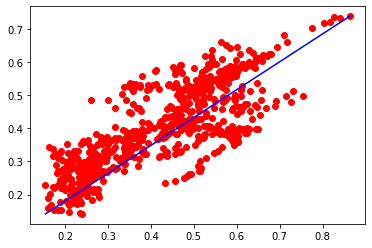

In [31]:
import dataset
import model
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

#set device
device = "cuda"

#hyper parameters
n_epoch = 10
batch_size = 16
lr = 0.01

#dataset and dataloader
train_set = dataset.COVID19Dataset(mode="train")
test_set = dataset.COVID19Dataset(mode="test")

train_loader = DataLoader(dataset = train_set, shuffle = True, batch_size = batch_size, num_workers = 2)
test_loader = DataLoader(dataset = test_set, shuffle = True, batch_size = batch_size, num_workers = 2)

#setup model
model = model.Regression()
critirion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

#training loop

for epoch in range(n_epoch):
    for i, (features, labels) in enumerate(train_loader):
        predicted = model(features)
        loss = critirion(predicted, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f'epoch: {epoch+1}/{n_epoch}', f'loss: {loss.item():.3f}')

#test total loss
#also plot regression
model.eval()
total_loss = 0.0
pred = []
gt = []
with torch.no_grad():
    for i, (features, labels) in enumerate(test_loader):
        predicted = model(features)
        pred.append(predicted.detach().cpu())
        gt.append(labels.detach().cpu())
        loss = critirion(predicted, labels).detach().cpu().item()
        total_loss += loss*batch_size

total_loss /= len(test_set)
print(f'test avg loss:{total_loss:.3f}')

pred = torch.cat(pred, dim=0).numpy()
gt = torch.cat(gt, dim=0).numpy()
plt.scatter(gt, pred,c='r')
plt.plot([gt.min(), gt.max()], [pred.min(), pred.max()], c='b')
plt.show()


In [ ]:
'''
epoch: 1/10 loss: 0.163
epoch: 2/10 loss: 0.302
epoch: 3/10 loss: 0.187
epoch: 4/10 loss: 0.046
epoch: 5/10 loss: 0.051
epoch: 6/10 loss: 0.100
epoch: 7/10 loss: 0.074
epoch: 8/10 loss: 0.178
epoch: 9/10 loss: 0.036
epoch: 10/10 loss: 0.037
test avg loss:0.284
'''